In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BASE_PATH = "/hd2/marcos/research/repos/pig-segmentation-distill/data"
IMG_DIR = f"{BASE_PATH}/PigLife/test/images"
GT_DIR = f"{BASE_PATH}/PigLife/test/labels"
PRED_DIR = f"{BASE_PATH}/SAM3_PigLife_labels/test"

In [3]:
def draw_yolo_boxes(image, label_path, color, label_text):
    if not os.path.exists(label_path):
        return image
    
    h, w, _ = image.shape
    
    with open(label_path, 'r') as f:
        for line in f:
            parts = list(map(float, line.strip().split()))
            
            cls_id, x_c, y_c, bw, bh = parts[:5]
            
            x_min = int((x_c - bw / 2) * w)
            y_min = int((y_c - bh / 2) * h)
            x_max = int((x_c + bw / 2) * w)
            y_max = int((y_c + bh / 2) * h)
            
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 4)
            
            text_size = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]
            cv2.rectangle(image, (x_min, y_min - 25), (x_min + text_size[0] + 10, y_min), color, -1)
            cv2.putText(image, label_text, (x_min + 5, y_min - 8), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
            
    return image

In [4]:
def visualize_random_sample():
    all_images = [f for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    random_img_name = random.choice(all_images)
    
    img_path = os.path.join(IMG_DIR, random_img_name)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    txt_name = os.path.splitext(random_img_name)[0] + ".txt"
    gt_path = os.path.join(GT_DIR, txt_name)
    
    image = draw_yolo_boxes(image, gt_path, (255, 0, 0), "GT")
    
    pred_path = os.path.join(PRED_DIR, txt_name)
    
    image = draw_yolo_boxes(image, pred_path, (0, 200, 0), "SAM3")

    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{random_img_name}", fontsize=14)
    plt.show()

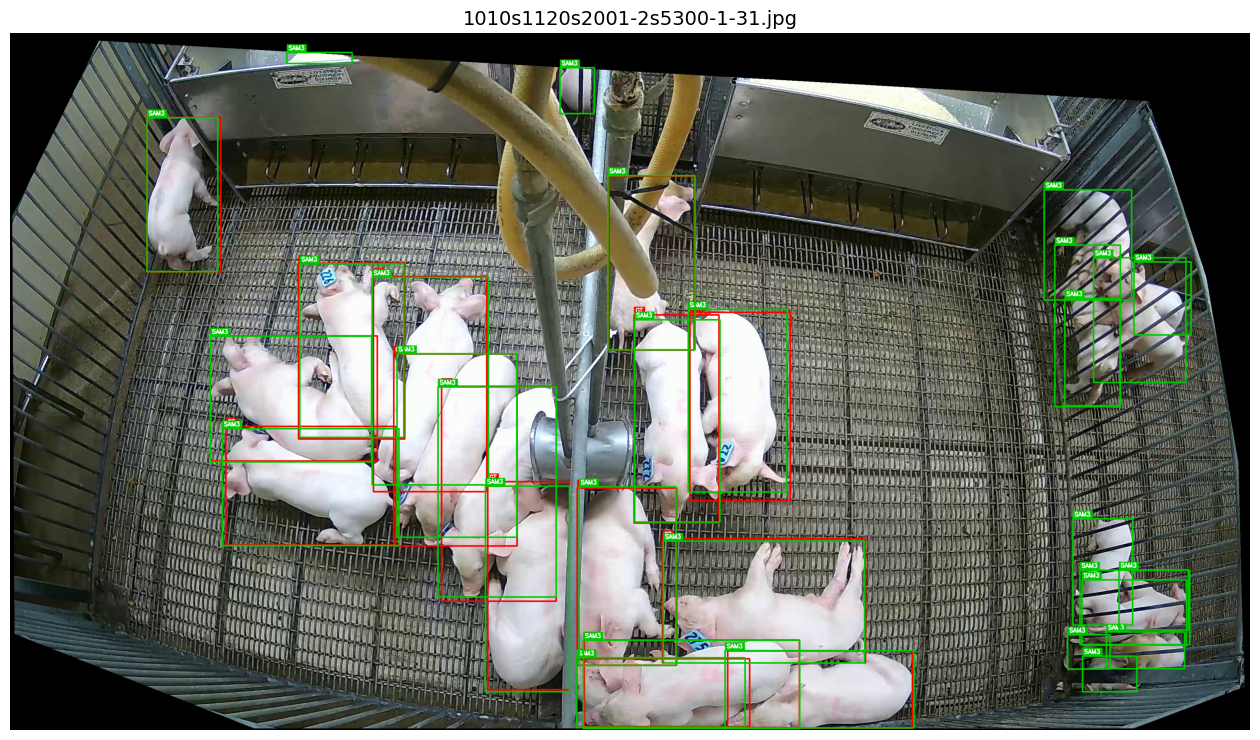

In [13]:
visualize_random_sample()